In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.read_csv("C:\\Users\\DELL\\Desktop\\airquality.csv")
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,Medium


In [3]:
file['Ozone'].fillna(file['Ozone'].mean(), inplace=True)
file['Solar.R'].fillna(file['Solar.R'].mean(), inplace=True)
file['Wind'].fillna(file['Wind'].mean(), inplace=True)
file['Humidity'].fillna("Medium",inplace=True)
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,High
1,2,36.00000,118.000000,8.0,72,5,2,High
2,3,12.00000,149.000000,12.6,74,5,3,Low
3,4,18.00000,313.000000,11.5,62,5,4,Medium
4,5,42.12931,185.931507,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,Low
149,150,42.12931,145.000000,13.2,77,9,27,Low
150,151,14.00000,191.000000,14.3,75,9,28,High
151,152,18.00000,131.000000,8.0,76,9,29,Medium


In [4]:
file.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
Humidity      0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=file[['Ozone']]
Y=file[['Temp']]

In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

In [27]:
Xtrain.shape

(107, 1)

In [28]:
Xtest.shape

(46, 1)

In [29]:
Xtest.shape

(46, 1)

In [30]:
Ytest.shape

(46, 1)

In [31]:
from sklearn import linear_model


In [32]:
reg=linear_model.LinearRegression()

In [33]:
model=reg.fit(Xtrain,Ytrain)
model

LinearRegression()

In [15]:
prediction = model.predict(x_test)
prediction

array([85.36257925, 84.04273238, 70.18869389, 84.88647233, 79.50767849,
       82.33708243, 79.46086366, 94.76107761, 77.66756691, 83.16721618,
       81.56176589, 79.65689994, 81.43723221, 81.82040674, 67.49650219,
       73.20052577, 68.41492104, 72.64283708, 75.09610102, 69.00590495,
       74.96797159, 81.61256993, 71.38390739, 78.60088787, 73.17834836,
       82.22705379, 75.0631215 , 73.49842133, 77.96545236, 84.30512998,
       89.44388905, 79.88950162, 64.48635801, 89.99779904, 72.35280567,
       80.57236586, 72.96885021, 76.97487302, 78.10112332])

In [34]:
Ypred=model.predict(Xtest)

In [35]:
print(Ypred)

[[78.02768297]
 [73.97877013]
 [72.14910948]
 [71.78317735]
 [72.69800768]
 [84.40783585]
 [75.44249865]
 [78.02768297]
 [72.88097374]
 [73.612838  ]
 [72.69800768]
 [81.11444668]
 [83.67597159]
 [70.50241489]
 [92.64130878]
 [78.02768297]
 [84.95673404]
 [75.99139685]
 [75.44249865]
 [76.90622718]
 [90.07978387]
 [85.32266618]
 [78.02768297]
 [88.06715715]
 [77.8210575 ]
 [78.02768297]
 [73.612838  ]
 [78.02768297]
 [78.02768297]
 [71.96614342]
 [72.51504161]
 [78.02768297]
 [74.71063439]
 [79.46775209]
 [77.45512537]
 [75.80843078]
 [78.02768297]
 [91.90944452]
 [74.1617362 ]
 [78.3699557 ]
 [74.34470226]
 [78.3699557 ]
 [71.60021129]
 [72.88097374]
 [78.02768297]
 [73.612838  ]]


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
    mse=mean_squared_error(Ytest,Ypred)
    mae=mean_absolute_error(Ytest,Ypred)
    r2= r2_score(Ytest,Ypred)

In [38]:
print('Mean squared error :',mse)
print('Root mean square error:',mae)
print('r2:',r2)

Mean squared error : 59.37211044600061
Root mean square error: 6.163440511427081
r2: 0.43586404080999164


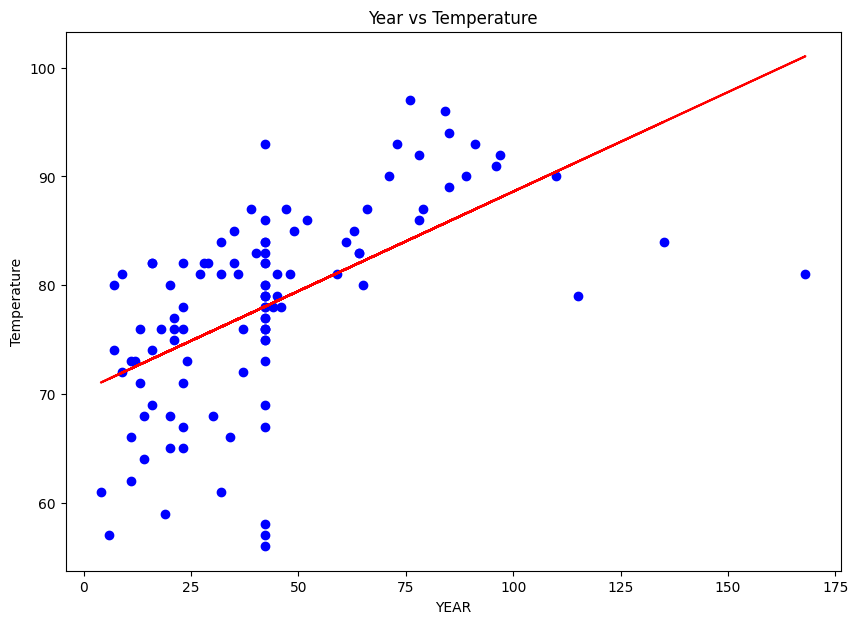

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title('Year vs Temperature')
plt.xlabel('YEAR')
plt.ylabel('Temperature')
plt.plot(Xtrain,reg.predict(Xtrain),color='red')
plt.scatter(Xtrain,Ytrain,color='blue')
